<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Ali Nazari<br>
   **Student ID**: 99102401<br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [190]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

در این بخش دیتاست را وارد می کنیم و دیتاست هم بسیار ساده است به این شکل که اطلاعات چند استارتاپ را دارد و به عنوان خروجی سود حاصل از اون استارتاپ را باید به دست آوریم و در نتیجه ۴ تا فیچر داریم و یک خروجی هم داریم که کد زیر ۵ نمونه اول از آن را می بینیم.

In [191]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


در این بخش هم چون که یکی از ستون ها عدد نیست و مکان آن استارتاپ است، میایم 
<br>
label encoder
<br>
می زنیم تا تبدیل به عدد شوند و چون که در این حالت عددی بین ۰ تا ایکس می دهد، ممکن است مدل اولویت دهد و در نتیجه در ادامه کار از
<br>
onehot encoder
<br>
استفاده می کنیم تا ستون های مختلف با صفر و یک بسازد و دیگر مشکل قبل به وجود نیاید.

In [192]:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder()
a = onehotencoder.fit_transform(X[:,[3]]).toarray()

همه ستون های قبلی که از
<br>
onehot encoder
<br>
به دست آمدند نیاز نیستند و در نتیجه یکی از ستون هایش را حذف می کنیم بدون اینکه مشکلی پیش بیاید.

In [193]:
#Avoiding the dummy variable Trap
a=a[:,1:]

سپس اون بخش های انکد شده را وارد دیتاست می کنیم.

In [194]:
#Adding encoded data into X
X = X[:,:3]
X=np.concatenate((X, a),axis=1)

در این بخش هم که دیتا را به ترین و تست تقسیم می کنیم.

In [195]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

مدل را می سازیم و به راحتی فیت می کنیم دیتا را

In [196]:
#making Linear Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
print(regressor.get_params())
regressor.fit(X_train,y_train)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


LinearRegression()

سپس کار پیشبینی را انجام می دهیم. در این بخش دقت کنید که مقدار 
<br>
MSE
<br>
به این دلیل زیاد شد چون که خود عدد خروجی مقدار بزرگی دارد مثلا ۱۰۰۰۰۰ و در حالتی که مدل به خوبی ۹۹۰۰۰ هم پیش بینی کند باز ۱۰۰۰ تا اختلاف است که در توان ۲ رسیدن مقدار بزرگی می شود و برای همین مقدارش زیاد شده و در نتیجه من هم خود مقدار های واقعی را چاپ کردم و هم اختلاف از مقدار پیشبینی شده تا ببینیم که مدل به نسبت خوب کار کرده است.

In [197]:
from sklearn.metrics import mean_squared_error
y_pred=regressor.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(y_test - y_pred)
print(y_test)
print(mse)

[   267.17840204  11677.12239184  13674.21154826   5822.73148742
  12512.90778945 -11152.93230165  13377.36790324  -1308.17374687
  -3617.18533012  -1733.1256955 ]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
83502864.03257737


حال می خواهیم هایپر پارامتر های مختلف را بررسی کنیم

In [198]:
regressor=LinearRegression()

regressor.set_params(copy_X=False, fit_intercept=False)

regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(y_test - y_pred)
print(y_test)
print(mse)

[-13580.06205355  25597.99919003  21168.97108104  17118.81963581
  20899.31734342 -19043.20460769  26207.72690872  -8046.64331054
  -5114.84705296  10202.48325819]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
326212582.0713295


In [199]:
regressor=LinearRegression()

regressor.set_params(copy_X=False, positive=False)

regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(y_test - y_pred)
print(y_test)
print(mse)

[   267.17840204  11677.12239184  13674.21154826   5822.73148742
  12512.90778945 -11152.93230165  13377.36790324  -1308.17374687
  -3617.18533012  -1733.1256955 ]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
83502864.03257737


حال با لاسو و الاستیک و ... می رسیم

In [200]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

R squared training set 95.02
R squared test set 93.47
MSE training set 81571009.19
MSE test set 83472605.37


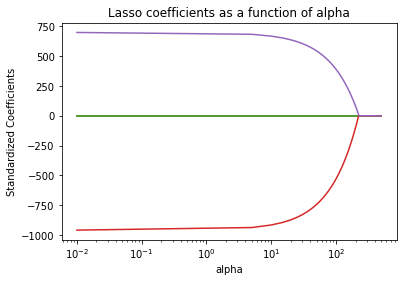

In [201]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [202]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

model.alpha_

9961916.290444203

In [222]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

9031.666632027325
0.9501847625348212
9137.63122843114
0.9347119764305161


In [223]:
from sklearn.linear_model import ElasticNet

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

9031.674092368105
0.9501846802379836
9130.95559023943
0.9348073359406908


پس روی این دیتا با مقایسه ای که به راحتی می توان انجام داد این است که 
<br>
elastic net
<br>
از همه بهتر کار کرد

In [203]:
#adding column of 1's in X
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)

In [204]:
import statsmodels.api as sm1
#backward Elimination
X_opt=np.array(X[:,[0,1,2,3,4,5]],dtype = float)
regressor_OLS=sm1.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        09:35:32   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
#forward selection
X_opt2=np.array(X[:,[0]],dtype = float)
regressor_OLS2=sm1.OLS(endog=y,exog=X_opt2).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                nan
Time:                        09:35:32   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   5700.155     19.651      0.000    1.01e+05    1.23e+05
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- Now I want to implement it by myself</b>

In [206]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [207]:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder()
a = onehotencoder.fit_transform(X[:,[3]]).toarray()

In [208]:
#Avoiding the dummy variable Trap
a=a[:,1:]
#Adding encoded data into X
X = X[:,:3]
X=np.concatenate((X, a),axis=1)

In [209]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [210]:
X = np.append(np.ones((50, 1)), X , axis=1)
X = X.astype(np.int32)
X

array([[     1, 165349, 136897, 471784,      0,      1],
       [     1, 162597, 151377, 443898,      0,      0],
       [     1, 153441, 101145, 407934,      1,      0],
       [     1, 144372, 118671, 383199,      0,      1],
       [     1, 142107,  91391, 366168,      1,      0],
       [     1, 131876,  99814, 362861,      0,      1],
       [     1, 134615, 147198, 127716,      0,      0],
       [     1, 130298, 145530, 323876,      1,      0],
       [     1, 120542, 148718, 311613,      0,      1],
       [     1, 123334, 108679, 304981,      0,      0],
       [     1, 101913, 110594, 229160,      1,      0],
       [     1, 100671,  91790, 249744,      0,      0],
       [     1,  93863, 127320, 249839,      1,      0],
       [     1,  91992, 135495, 252664,      0,      0],
       [     1, 119943, 156547, 256512,      1,      0],
       [     1, 114523, 122616, 261776,      0,      1],
       [     1,  78013, 121597, 264346,      0,      0],
       [     1,  94657, 145077,

In [211]:
# .dot() represent matrix multiplication in numpy
def lr_predict(X, W):
    return np.dot(X, W)

In [212]:
def closed_form_lr(X, Y):
    W = np.dot((np.linalg.inv((np.dot(X.T,X)).astype(np.int32))), np.dot(X.T,Y))
    predictions = lr_predict(X, W)
    return predictions

In [213]:
predictions = closed_form_lr(X_train, y_train)

In [214]:
def mse_loss(pred, real):
    diff = pred - real
    return np.sum(diff * diff) / diff.size
mse_loss(predictions, y_train)

2.6814448264873016e+16

In [215]:
# Weights
W = np.random.rand(5, 1)
W

array([[0.11417626],
       [0.58159398],
       [0.61215313],
       [0.37622967],
       [0.94226448]])

In [216]:
predictions = lr_predict(X_train, W)
predictions

array([[197663.4538403889],
       [180525.99619840123],
       [174488.93234477768],
       [226055.0422937582],
       [257415.841473232],
       [297778.85871320416],
       [261767.26981867122],
       [73487.30165495336],
       [30156.33584365091],
       [162079.14936930666],
       [244637.17353430067],
       [130121.21961291613],
       [110604.36318121087],
       [241447.91552290384],
       [149241.88496251102],
       [257759.30618837522],
       [97608.46020361935],
       [291013.1323420901],
       [243976.09104235965],
       [173000.70144409474],
       [295236.5044959951],
       [268163.5374360078],
       [178006.1405401987],
       [95689.90341589965],
       [378338.96586051135],
       [237706.14915044568],
       [155469.8833741861],
       [152592.27823997228],
       [179162.11672883667],
       [255780.281709165],
       [200288.6357521405],
       [281869.97934603406],
       [99150.9019077418],
       [263984.51890399354],
       [159790.71923696465],
   

In [217]:
loss = mse_loss(predictions, y_train)
print(loss)

17305961363.844696


In [218]:
def calc_gradient(X, error):
    gradient = np.dot(X.T, error)
    return gradient

In [219]:
def update_weights(W, lr, gradient):
    new_weights = W - lr * gradient
    return new_weights

In [220]:
def train_model_lr_gd(X, Y, W, n_epoches, lr):
    losses = []
    for i in range(n_epoches):
        # generating the predictions 
        predictions = lr_predict(X, W)
        error = predictions - Y
        # calculating the loss
        loss = mse_loss(predictions, Y)
        # adding the loss to our loss list 
        losses.append(loss)
        # calculating gradients
        gradient = calc_gradient(X, error) / Y.size
        # updating weights and biases
        W = update_weights(W, lr, gradient)
    return W, losses

In [221]:
W = np.random.rand(5, 1)
lr = 1e-5
n_epoches = 100
W, losses = train_model_lr_gd(X_train, y_train, W, n_epoches, lr)
print(losses[-1])

nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
